ejercicio : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:
[0. , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1. ]
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.
Usando unicamente NumPy crea un vector de este tipo con el nombre xs .
nota: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [2]:
import numpy as np

# tu codigo aqui (~ 5 lineas de codigo):
arr1 = np.linspace(0,0.5,6)
arr2 = np.linspace(0.51,0.59,9)
arr3 = np.linspace(0.6,1,5)

arr = np.hstack((arr1,arr2,arr3))
print(arr)

[0.   0.1  0.2  0.3  0.4  0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58
 0.59 0.6  0.7  0.8  0.9  1.  ]


Ejercicio (parte de tarea) En este caso usamos un ciclo para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for.
tip: usar slicing

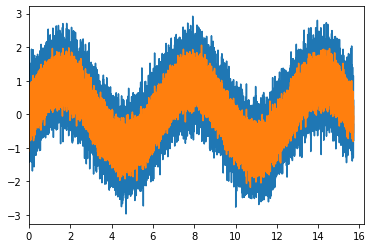

In [11]:
import numpy as np
import matplotlib.pyplot as plt


sample_points = 100000 #10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

#Sustituyendo el ciclo for

ins = np.insert(ys,0,0)

ins2 = np.delete(ins, np.s_[-1:])

ins3 = ys[1:]

ins4 = np.append(ins3,0)

ys = (ys+ins2+ins4)/3


##Continuación

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)#limieteX
plt.show()

Ejercicio Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

S=−∑inP(xi)log2P(xi)


In [13]:
# tu codigo aqui (~ 4 lineas de codigo)
import numpy as np

def calcEntro(s):
  
  return s*np.log2(s)*-1

print(calcEntro(np.array([0.3,0.7])))


[0.52108968 0.36020122]


Ejercicio : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
c(x)=(x2+x+log(0.0001x)−0.54x−−−−−√)/100 

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función ganancia_neta(x,g,c) donde:

x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
g = función que estima la ganancia en función de x
c = función que estima el costo en función de x
La función realiza el calculo simple g(x) - c(x) , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [15]:
def ganancia(x):
  gananc = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
  return gananc

def costo(x):
  cost = (np.power(x,2)+x+np.log2(0.0001*x))-np.sqrt(0.54*x)/100
  return cost

def ganancia_neta(x,g,c):
  resultado = g(x) - c(x)
  return resultado

print("Ganancia neta: ",ganancia_neta(np.array([40,90,80,50]),ganancia,costo))

Ganancia neta:  [-288.14654519 6720.61742564 4022.79868942   57.51591796]


En muchos casos es útil usar sumas o productos acumulativos , por ejemplo:

Ejemplo aplicado En un datawarehouse se tiene un modelo "lifetime value" en el que se almacena de manera acumulativa cuantas ganancias se han percibido a lo largo de la vida de los usuarios, un ETL en Python debe calcularlo en función de un vector que contiene de manera ordenada en el tiempo los ingresos percibidos mensualmente para cierto usuario. Podemos usar la funcion np.cumsum para esto, en este ejercicio necesitamos determinar el "lifetime value" de cierto usuario en su 6to mes:

In [19]:
import numpy as np

def valorLT(a):
    ganancia = np.cumsum(a)
    return ganancia
    pass


ganUsuario = np.array([10,20,35,45,50,75])
lifeTime = valorLT(ganUsuario)

print("Este es el lifetime value:",lifeTime)
print("Sexto mes:",lifeTime[5])

Este es el lifetime value: [ 10  30  65 110 160 235]
Sexto mes: 235


Ejercicio Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:
(valor,conteo)
tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [23]:
import numpy as np
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    a,b = np.unique(x, return_counts=True)
    return (a[np.argmax(b)])
    
    pass

x = np.array([10,11,12,13,14,15,10,15,14,17,16,17,15,17,12,17])
print(mode(x))

17


Ejercicio : crear una función para calcular la entropía de una distribución de probabilidad representada como un vector. S=−∑inP(xi)log2P(xi)
Nota: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.
recordatorio: no usar ciclos solo operaciones vectorizadas.

In [27]:
def entrV2(dato):
  calculo= dato*np.log2(dato)*-1
  return(np.sum(calculo))
  
entrada = np.array([0.40,0.60])
print(entrV2(entrada))

0.9709505944546686


#Proyección vectorial

Proyección vectorial o Proyección de un vector sobre otro es la traza de una recta perpendicular "r" del punto inicial hasta la recta del segundo vector.

Si se tienen dos vectores "u" y "v", la proyección del primero sobre el segundo, deberá realizarse trazando la recta desde el punto inicial hasta que se forme un ángulo de 90 grados entre la traza "a" y el vector "v".

La fórmula dada es la siguiente:

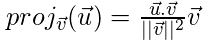

In [28]:
import numpy as np

def calcProyVec(u,v):
  vec = np.sqrt(sum(v**2))

  proy = (np.dot(u,v)/vec**2)*v

  print("Proyección de u sobre v: ",proy)

In [29]:
import numpy as np

u = np.array([3,2,1])
v = np.array([4,5,6])

calcProyVec(u,v)

Proyección de u sobre v:  [1.45454545 1.81818182 2.18181818]


##Interpretación de funcion calcProyVec(u,v)

La función pide como parámetros dos vectores u y v en donde "u" será el primer vector y "v" será sobre el que se calculará la proyección.
Siguiendo la fórmula para la proyección de vectores, se calcula primero la sección del denominador ||v|| (al cuadrado)
El siguiente paso es realizar la fórmula dada a través de la función dot de Numpy que devuelve el producto de puntos de dos matrices, en este caso, u y v. Esto es dividido entre el resultado obtenido previamente de calcular la potencia de v y finalmente todo es multiplicado por v.

##Aplicación

La proyección de vectores se puede usar en la física, específicamente en cálculos de trabajo y fuerza.

#Producto Cruz

El producto cruzado da como resultado un vector perpendicular al plano.

In [30]:
import numpy as np

def prodCruz(u,v):
  calculo = np.cross(u,v)

  print("El producto cruz de u y v es:",calculo)

In [31]:
import numpy as np

u = np.array([1,2])
v = np.array([3,4])

prodCruz(u,v)

El producto cruz de u y v es: -2


##Interpretación

El producto cruzado matemáticamente es la la resta de las multiplicaciones obtenidas de forma cruzada de los valores de los arreglos.
La función prodCruz requiere dos parametros, u y v. Estos son utilizados en la función cross de numpy cuyo valor retornado se almacena en la variable cálculo. Es esta variable la que es impresa al final de la ejecución.

##Uso

Es utilizado para definir rutas o trayectorias